- __Name : Subham Sarkar__
- __Github : https://github.com/SubhamIO__
- __LinkedIn : https://www.linkedin.com/in/subham-sarkar-4224aa147/__

## Problem Statement
- Predict the sales demand for consumer goods.

## Objective

- The objective of this exercise is to predict sales of 2018-42 to 2018-52 of each SKU. The data present in the mentioned week are only for computation of accuracy and bias only. So please use the sales data till 2018-41.

## Steps recommended :
__The following pre-processing treatment needs to be done if needed:__
1. Initial zero removal:
   There are some SKU’s for which initial week sales are 0.it means sales was not started after that period. Those weeks needs to be removed before fitting the data into the model.
2. Duplicate treatment
3. Outlier treatment


## Files and Folders details:
1. __app1.py__   -  This file contains all the helper functions. All the functions for automation is present here,
2. __EY_Sales_Pred.ipynb__   - This file uses the app1.py to perform automation.
3. __saved_models__ -  This folder contains trained_models
4. __upload-aiml-automation__   - This folder contains the prediction.csv or the output file.

## Loading Dependencies

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import seaborn as sns
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

import math
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import os



import pandas as pd
import numpy as np
import ipywidgets as wg 
from IPython.display import display
from ipywidgets import Layout
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import KBinsDiscretizer
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.pca import PCA as PCA_od
from sklearn import cluster
from scipy import stats
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor as rfr

import sys 
from sklearn.pipeline import Pipeline
from sklearn import metrics
from datetime import datetime
import calendar
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict


from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

Using TensorFlow backend.


In [2]:
# Loading helper functions
from app1 import *

In [3]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d%m%Y%H%M%S")
print("date and time =", dt_string)

date and time = 06112020104937


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Data

In [4]:
data = pd.read_excel('case_study.xlsx')

In [5]:
data.head()

,SKU,ISO_Week,Sales,Season
0,ProductA,2018-01,0.0,WINTER
1,ProductA,2018-02,0.0,WINTER
2,ProductA,2018-03,0.0,WINTER
3,ProductA,2018-04,6988.0,WINTER
4,ProductA,2018-04,6988.0,WINTER


In [6]:
data.shape

(150, 4)

## Initial Zeroes removal
- There are some SKU’s for which initial week sales are 0.it means sales was not started after that period. Those weeks needs to be removed before fitting the data into the model.

In [7]:
data = data[data['Sales'] != 0]

In [8]:
data.shape

(130, 4)

## Exploratory Data Analysis

### Checking for nulls

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 3 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU       130 non-null    object 
 1   ISO_Week  130 non-null    object 
 2   Sales     123 non-null    float64
 3   Season    130 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.1+ KB


In [10]:
data.isnull().sum()

SKU         0
ISO_Week    0
Sales       7
Season      0
dtype: int64

- __Sales__ columns(__target__) has 7 null data points
- __Better to remove the rows corresponding to the missing values in target data__ --> This is handled in preprocessing part(automated)

## Checking frequencies for entire data

ProductA    51
ProductC    43
ProductB    36
Name: SKU, dtype: int64


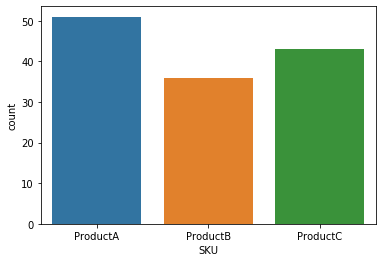

In [11]:
ax = sns.countplot(x=data['SKU'], data=data)
print(data['SKU'].value_counts())

SPRING    35
SUMMER    34
AUTUMN    34
WINTER    27
Name: Season, dtype: int64


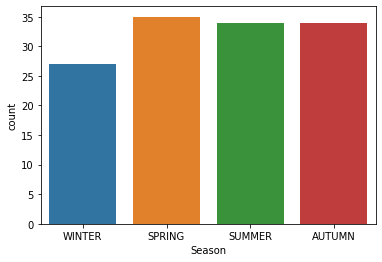

In [12]:
ax = sns.countplot(x=data['Season'], data=data)
print(data['Season'].value_counts())

### Observation:
1. Promotion going on for __SKU 'Product B'__ is lesser compared to that of __'Product A; and 'Product B'__
2. Promotion in __WINTER__ is less. But for which __SKU__ ?

## Let's check seasonwise product promotions

In [13]:
### pivot_table for two categorical features one being loan_status
def pivot(train,col): 
    return pd.pivot_table(train,'ISO_Week',index=[col],columns=['SKU'],aggfunc='count')

In [14]:
pivot(data,'Season')

SKU,ProductA,ProductB,ProductC
Season,,,
AUTUMN,13,8,13
SPRING,15,7,13
SUMMER,13,8,13
WINTER,10,13,4


### Observation:
- We earlier saw that promotion in WINTER is less but for which product.
- It is for __Product C.__ . Promotions for '__Product C__' in WINTER is less. 

## Train_Test Split
- Done using the criteria given

In [15]:
end_date = "2018-41"
after_end_date = data["ISO_Week"] <= end_date
train_data = data.loc[after_end_date]
train_data.shape

(100, 4)

In [16]:
start_date = "2018-42"
after_start_date = data["ISO_Week"] >= start_date
test_data = data.loc[after_start_date]
test_data.shape

(30, 4)

In [17]:
# This will be later used to frame a Dataframe end result
iso_week = list(test_data['ISO_Week'])
skus = list(test_data['SKU'])

In [18]:
len(iso_week),len(skus)

(30, 30)

## Let's check some information for train and test data

# Train Data

ProductA    40
ProductC    32
ProductB    28
Name: SKU, dtype: int64


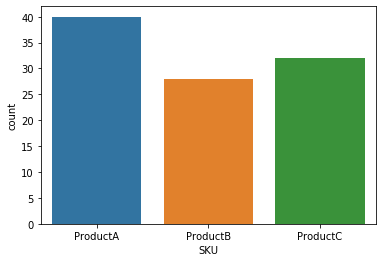

In [19]:
ax = sns.countplot(x=train_data['SKU'], data=train_data)
print(train_data['SKU'].value_counts())

SPRING    35
SUMMER    34
AUTUMN    16
WINTER    15
Name: Season, dtype: int64


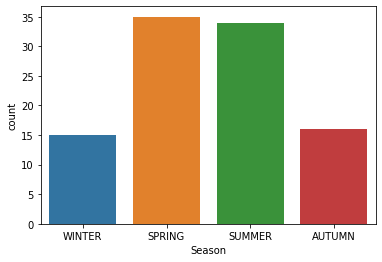

In [20]:
ax = sns.countplot(x=train_data['Season'], data=train_data)
print(train_data['Season'].value_counts())

In [21]:
pivot(train_data,'Season')

SKU,ProductA,ProductB,ProductC
Season,,,
AUTUMN,6.0,4.0,6.0
SPRING,15.0,7.0,13.0
SUMMER,13.0,8.0,13.0
WINTER,6.0,9.0,NaN


### Observation:
1. Promotion in WINTER and AUTUMN is lesser than SPRING and SUMMER
2. Only 'Product A' and 'Product B' are contributing to WINTER values.

# Test Data

ProductC    11
ProductA    11
ProductB     8
Name: SKU, dtype: int64


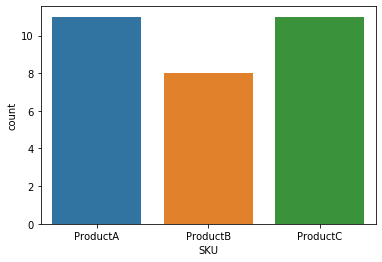

In [22]:
ax = sns.countplot(x=test_data['SKU'], data=test_data)
print(test_data['SKU'].value_counts())

AUTUMN    18
WINTER    12
Name: Season, dtype: int64


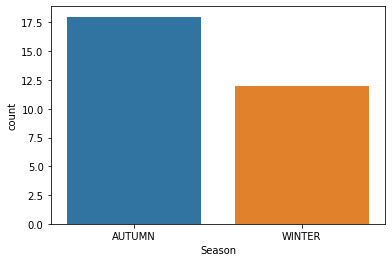

In [23]:
ax = sns.countplot(x=test_data['Season'], data=test_data)
print(test_data['Season'].value_counts())

In [24]:
pivot(test_data,'Season')

SKU,ProductA,ProductB,ProductC
Season,,,
AUTUMN,7,4,7
WINTER,4,4,4


### Observation : 
1. Promotions only happening in AUTUMN and WINTER season.
2. No statistics found for SPRING and SUMMER season in test data

## Checking Outliers

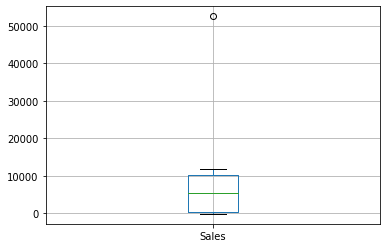

In [25]:
train_data.boxplot()

In [26]:
## SEE the number of of outliers 

Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
print('No. of outliers in all the fields: ',((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).sum())

No. of outliers in all the fields:  ISO_Week    0
SKU         0
Sales       1
Season      0
dtype: int64


### Mention the target variable here

In [27]:
target = input('Enter the target variable: ')

Enter the target variable: Sales


## Data Preprocessing
1. __Duplicate values removal__
2. Automatically identify __id__ column
3. Automatically identify __valid date columns__ and __fetch month,week,year and day features__
4. Automatically identify __categorical, text and numerial features and vectorise them separately__.
5. __Mising Value Imputation__ : For __Categorical Feature__ with another category= __'unknown'__ and for __Numerical Feature__ it is __'mean'__.
6. __Data Cleaning__ for __text features__ detected. 
7. __Vectorising techniques__ used : For catgorical : __Label Encoding__,  For Text: __TFIDF W2V__,  For Numerical: __StandardScaler__
8. __Automatically detect classification and regression problem__

In [28]:
X_train,X_test,y_train,y_test,id_for_later_use,id_= preprocessor(train_data,test_data,target)

100%|██████████| 30/30 [00:00<00:00, 12279.61it/s]

(89, 4) (30, 4)
SKU          object
ISO_Week     object
Sales       float64
Season       object
dtype: object
SKU          object
ISO_Week     object
Sales       float64
Season       object
dtype: object
Index(['SKU', 'ISO_Week', 'Season'], dtype='object') Index(['SKU', 'ISO_Week', 'Season'], dtype='object')
[] []
No id column found..  Assigning new id column!
['index'] ['index']
Numerical features:  ['index']
Text features detected:  []
Categorical Features :  ['cleanSKU', 'cleanISO_Week', 'cleanSeason']


## Model Building, Training and Testing

1. __Giving choice to compare from a list of models__ , or
2. __Choosing and Tuning your own specific model of choice.__
3. __Automatically detect CLASSIFICATION and REGRESSION problem and choose model accordingly__
3. Saving trained and tuned model to folder : __saved_models__
4. Saving prediction to a folder: __upload-aiml-automation__

In [29]:
option = input('Compare models or Choose specific model[Type: compare/choose]:  ')

Compare models or Choose specific model[Type: compare/choose]:  choose


In [30]:
if option == 'compare':
        df,ml_usecase = compare_models(X_train,X_test,y_train,y_test)
        if ml_usecase=='regression':
            df_styled = df.style.highlight_min()
            minValue = df['RMSE'].min()
            newdf = df[df.RMSE == minValue]
            modeldf = newdf['Model']
            for i in modeldf:
                wanted_model = i
            print(wanted_model)
            print('*'*50)
            print(df)
        else:
            df_styled = df.style.highlight_max()
            maxValue = df['Accuracy'].max()
            newdf = df[df.Accuracy == maxValue]
            modeldf = newdf['Model']
            for i in modeldf:
                wanted_model = i
            print(wanted_model)
            print('*'*50)
            print(df)

else:
    import sklearn.metrics as metrics
    estimator = input('Choose your estimator : ')
    model_chosen , model_results= choose_models(X_train,X_test,y_train,y_test,estimator)

    print('Initialising Model Tuning...')
    best_model,model_results_tuned ,ml_usecase= tune_models(X_train,X_test,y_train,y_test,model_chosen)

    print('Model Tuning Complete...')

    print('Saving Tuned Model...')
    model_export_filename = './saved_models/'+estimator+'_tuned_model_'+dt_string+'.pkl'
    save_model(best_model,model_export_filename)


    tuned_model_loaded = load_model(model_export_filename)
    predictions = tuned_model_loaded.predict(X_test)
    predictions_df = pd.DataFrame(predictions, columns =['Forecast'])
    predictions_df['ISO_Week'] = iso_week
    predictions_df['SKU'] = skus
    predictions_df = predictions_df[['SKU','ISO_Week','Forecast']]
    print(predictions_df)

    pred_filename = 'prediction_'+dt_string+'.csv'
    predictions_df.to_csv('./upload-aiml-automation/prediction_'+estimator+'_'+dt_string+'.csv')

    if ml_usecase == 'regression':
        #Final results
        mae = metrics.mean_absolute_error(y_test,predictions)
        mse = metrics.mean_squared_error(y_test,predictions)
        rmse = np.sqrt(mse)
        rmsle = np.sqrt(np.mean(np.power(np.log(np.array(abs(predictions))+1) - np.log(np.array(abs(y_test))+1), 2)))
        r2 = metrics.r2_score(y_test,predictions)
        final_model_results = pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE' : [rmse], 'R2' : [r2],'RMSLE' : [rmsle]})
        print('Regression Results : ')
        print(final_model_results)
    else:
        #Final results
        if hasattr(tuned_model_loaded, 'predict_proba'):

            pred_prob = tuned_model_loaded.predict_proba(X_test)
            pred_prob = pred_prob[:,1]
            sca = metrics.accuracy_score(y_test,predictions)
            #if tr_target_pr.value_counts().count() > 2  implies Multiclass
            if y_train.value_counts().count() > 2:
                sc = 0
                recall = metrics.recall_score(y_test,predictions, average='macro')
                precision = metrics.precision_score(y_test,predictions, average = 'weighted')
                f1 = metrics.f1_score(y_test,predictions, average='weighted')
            else:
                try:
                    sc = metrics.roc_auc_score(y_test,pred_prob)
                except:
                    sc = 0
                    print("model has no predict_proba attribute. AUC set to 0.00")
                recall = metrics.recall_score(y_test,predictions)
                precision = metrics.precision_score(y_test,predictions)
                f1 = metrics.f1_score(y_test,predictions)
        else:

            pred_prob = 0.00
            sca = metrics.accuracy_score(y_test,predictions)
            if y_train.value_counts().count() > 2:
                sc = 0
                recall = metrics.recall_score(y_test,predictions, average='macro')
                precision = metrics.precision_score(y_test,predictions, average = 'weighted')
                f1 = metrics.f1_score(y_test,predictions, average='weighted')
            else:
                try:
                    sc = metrics.roc_auc_score(y_test,pred_prob)
                except:
                    sc = 0
                    print("model has no predict_proba attribute. AUC set to 0.00")
                recall = metrics.recall_score(y_test,predictions)
                precision = metrics.precision_score(y_test,predictions)
                f1 = metrics.f1_score(y_test,predictions)
        mcc = metrics.matthews_corrcoef(y_test,predictions)
        kappa = metrics.cohen_kappa_score(y_test,predictions)
        final_model_results = pd.DataFrame({'Accuracy':[sca], 'AUC': [sc], 'Recall': [recall],'Prec.': [precision], 'F1': [f1], 'Kappa': [kappa], 'MCC':[mcc]})
        print('Classification Results : ')
        print(final_model_results)




Choose your estimator : rf
False
False
False
True
regression
Declaring metric variables
Importing untrained model
Random Forest Regressor Imported succesfully
Checking ensemble method
Initializing Fold 1
Fitting model:  RandomForestRegressor(n_jobs=-1, random_state=10)
Evaluating Metrics
Compiling Metrics
Initializing Fold 2
Fitting model:  RandomForestRegressor(n_jobs=-1, random_state=10)
Evaluating Metrics
Compiling Metrics
Initializing Fold 3
Fitting model:  RandomForestRegressor(n_jobs=-1, random_state=10)
Evaluating Metrics
Compiling Metrics
Initializing Fold 4
Fitting model:  RandomForestRegressor(n_jobs=-1, random_state=10)
Evaluating Metrics
Compiling Metrics
Initializing Fold 5
Fitting model:  RandomForestRegressor(n_jobs=-1, random_state=10)
Evaluating Metrics
Compiling Metrics
Initializing Fold 6
Fitting model:  RandomForestRegressor(n_jobs=-1, random_state=10)
Evaluating Metrics
Compiling Metrics
Initializing Fold 7
Fitting model:  RandomForestRegressor(n_jobs=-1, random_st

## Conclusion : 
1. The code is fully automated for both classification and regression tasks.
2. Performed: EDA, Initial zero removal, Duplicate treatment, Outlier detection ,  Data Preprocessing , Model Building,Code Automation.
3. Data is small so purposely didn't use Deep Learning since MLP's and advanced Algorithms are data hungry.
4. Larger training data can help in better results.

### Results:
- RandomForestRegressor worked best for this dataset